# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
number_of_mic=mouse_data_complete["Mouse ID"].unique()
number_of_mice= len(number_of_mic)
number_of_mice

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'])

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [6]:
mouse_data_complete.loc[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
mouse_data_complete.loc[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice = mouse_data_complete.loc[mouse_data_complete["Mouse ID"] == "g989", :]

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = mouse_data_complete[mouse_data_complete["Mouse ID"] != "g989"]
clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [10]:
# Checking the number of mice in the clean DataFrame.
mice_coun = clean["Mouse ID"].unique()
mice_count= len(mice_coun)
mice_count

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean =clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median =clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance =clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdandard_deviation =clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM =clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

tumor_summary=pd.DataFrame({"Mean of Tumor":mean, "Median of Tumor":median, "Var of Tumor":variance, "Std of Tumor":stdandard_deviation, "SEM of Tumor": SEM})
tumor_summary

,Mean of Tumor,Median of Tumor,Var of Tumor,Std of Tumor,SEM of Tumor
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary2 = clean.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

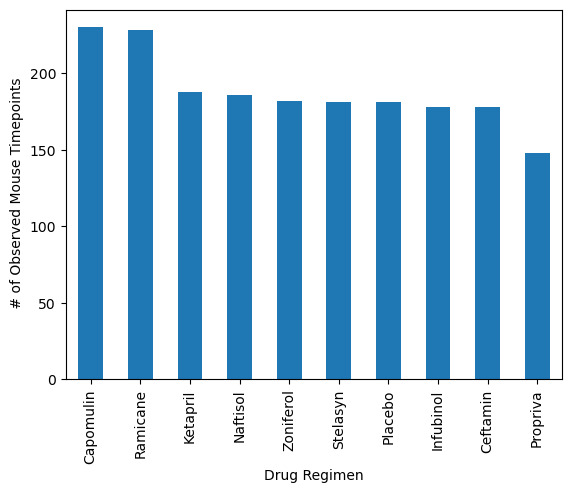

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_point = clean[["Drug Regimen","Timepoint"]]
drug_count = drug_point["Drug Regimen"].value_counts()
drug_count.plot(kind="bar", xlabel="Drug Regimen", ylabel=" # of Observed Mouse Timepoints")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

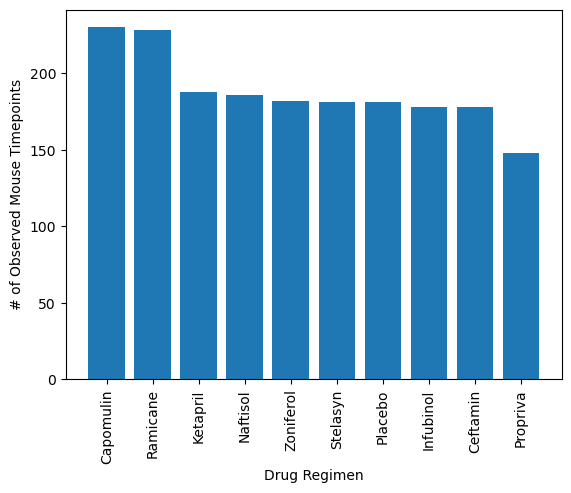

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
xvalue=drug_count.index.values
yvalue= drug_count
plt.bar(xvalue, yvalue, align = "center")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

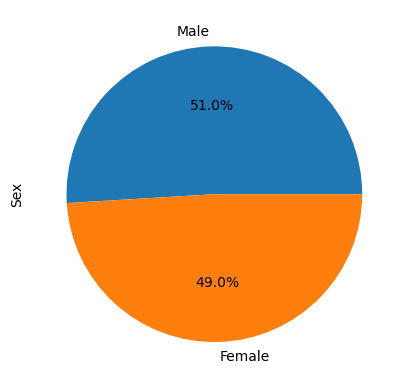

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female = clean[["Sex"]]
counts = male_female["Sex"].value_counts()
counts.plot(kind = "pie", autopct='%1.1f%%', ylabel = "Sex")
plt.show

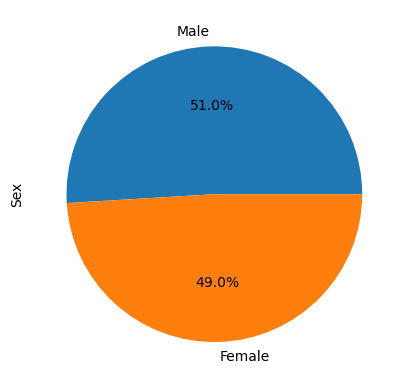

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x = counts.index.values
y = counts
plt.ylabel("Sex")
plt.pie(y, labels=x, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_drugs_data = clean.loc[(clean['Drug Regimen'] == "Capomulin")| (clean['Drug Regimen'] == "Ramicane")|(clean['Drug Regimen'] == "Infubinol")|(clean['Drug Regimen'] == "Ceftamin")]
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = four_drugs_data.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_data = pd.merge(clean, max_timepoint, how="right", on=["Mouse ID", "Timepoint"])
last_tumor_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volume = []
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes

for drug in drugs:
    tumorvolume_per_drug =last_tumor_data.loc[last_tumor_data['Drug Regimen']==drug,'Tumor Volume (mm3)']
    final_tumor_volume.append(tumorvolume_per_drug)
    quartiles = tumorvolume_per_drug.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq

    # add subset 

    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
ipper_bound = upperq + (1.5*iqr)

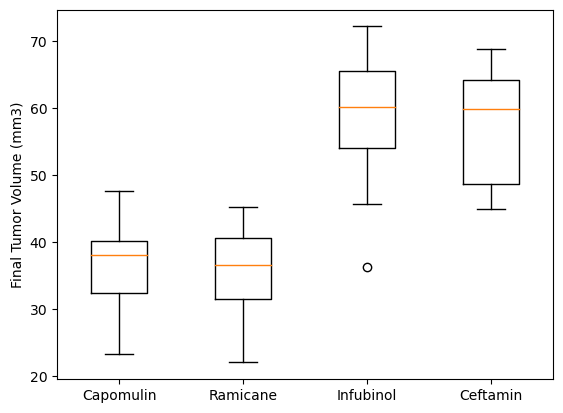

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(final_tumor_volume)
ax1.set_xticklabels(drugs)
plt.show()

## Line and Scatter Plots

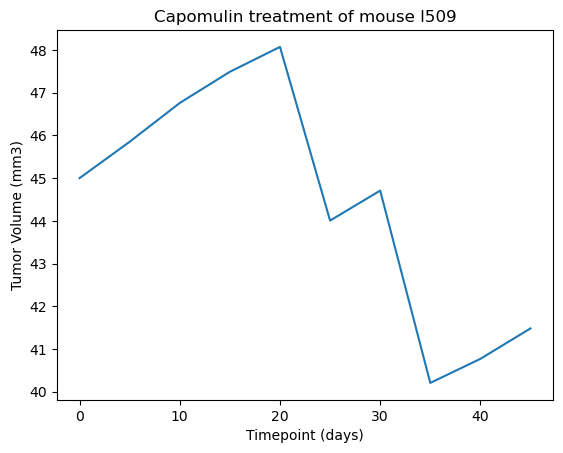

In [33]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = clean.loc[(clean['Drug Regimen'] == "Capomulin") & (clean["Mouse ID"] == "l509")]
tumorvolume = capomulin['Tumor Volume (mm3)']
timepoint = capomulin['Timepoint']
plt.plot(timepoint, tumorvolume)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

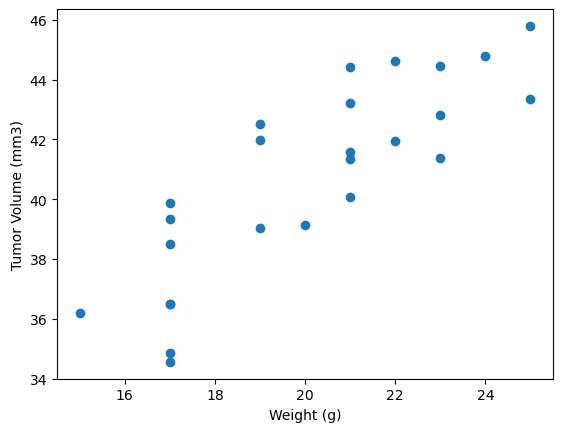

In [44]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulins = clean.loc[(clean['Drug Regimen'] == "Capomulin")]
ID = capomulins.groupby("Mouse ID")
avgtumorvol = ID[("Tumor Volume (mm3)")].mean()
avgweight = ID["Weight (g)"].mean()
plt.scatter(avgweight, avgtumorvol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

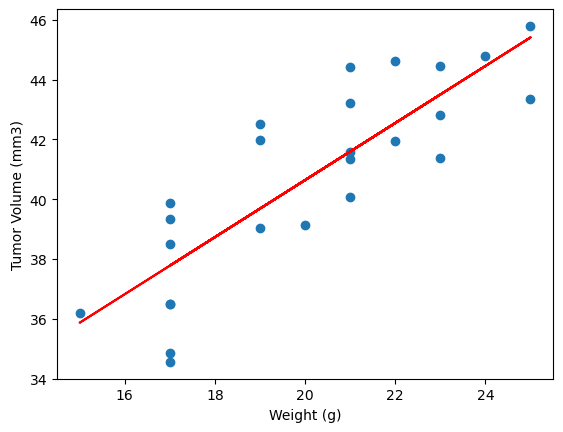

The r-value is: 0.7088568047708723
y = 0.95x + 21.55


In [53]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(avgweight, avgtumorvol)
regress_values = avgweight * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(avgweight,regress_values,"r-")
plt.scatter(avgweight, avgtumorvol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
print(f"The r-value is: {rvalue**2}")
print(line_eq)